Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline

Loading all Datasets

In [2]:
orig_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

orig_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
                     'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

orig_df_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', header=None, skiprows=1)

orig_df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
                     'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

#CTGAN DATASET 
ct_df = pd.read_csv('https://github.com/rudrakshkapil09/CMPUT622-Project/raw/main/Synthetic%20Data/ctgannew.csv')
ct_df = ct_df.iloc[: , 1:]
#TGAN DATASET 
t_df = pd.read_csv('https://github.com/rudrakshkapil09/CMPUT622-Project/raw/main/Synthetic%20Data/tgan_samples.csv')
t_df = t_df.iloc[: , 1:]
t_df.columns = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
                     'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

#PATEGAN 
p2_df = pd.read_csv('https://github.com/rudrakshkapil09/CMPUT622-Project/raw/main/Synthetic%20Data/eps2_k10_synth_data_pate.csv', sep ='\t')
p4_df = pd.read_csv('https://github.com/rudrakshkapil09/CMPUT622-Project/raw/main/Synthetic%20Data/eps4_k10_synth_data_pate.csv', sep ='\t')
p6_df = pd.read_csv('https://github.com/rudrakshkapil09/CMPUT622-Project/raw/main/Synthetic%20Data/eps6_k10_synth_data_pate.csv', sep ='\t')
p8_df = pd.read_csv('https://github.com/rudrakshkapil09/CMPUT622-Project/raw/main/Synthetic%20Data/eps8_k10_synth_data_pate.csv', sep ='\t')
p2_df = p2_df.iloc[: , 1:]
p4_df = p4_df.iloc[: , 1:]
p6_df = p6_df.iloc[: , 1:]
p8_df = p8_df.iloc[: , 1:]

Exploratory data analysis

In [3]:
orig_df.replace('?',np.NaN)
ct_df.replace('?',np.NaN)
t_df.replace('?',np.NaN)
p2_df.replace('?',np.NaN)
p4_df.replace('?',np.NaN)
p6_df.replace('?',np.NaN)
p8_df.replace('?',np.NaN)


orig_df.dropna()
ct_df.dropna()
t_df.dropna()
p2_df.dropna()
p4_df.dropna()
p6_df.dropna()
p8_df.dropna()

orig_df.drop('fnlwgt', inplace=True, axis=1)
orig_df_test.drop('fnlwgt', inplace=True, axis=1)

print("done")

done


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

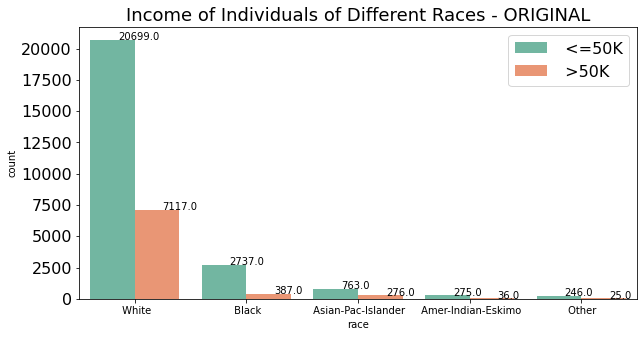

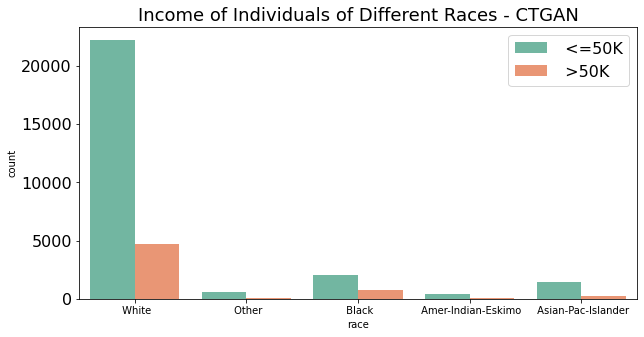

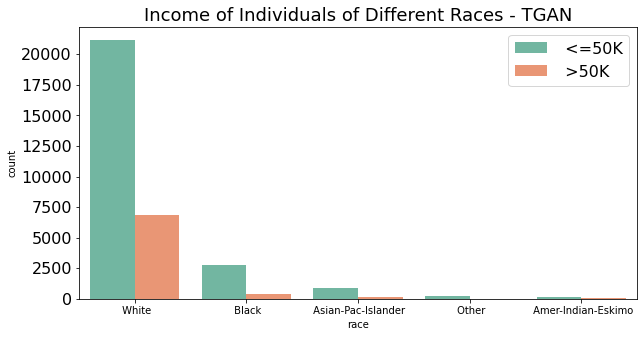

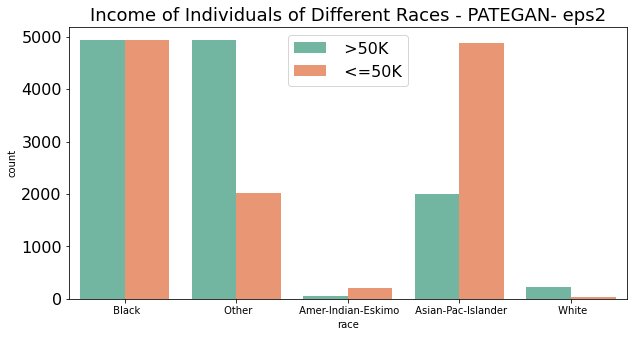

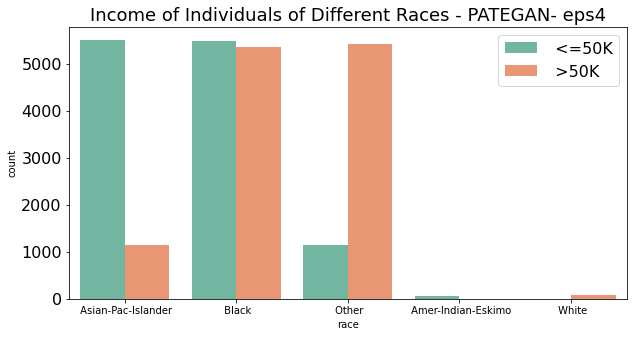

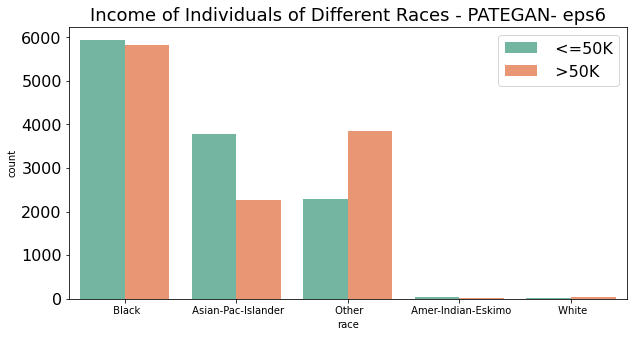

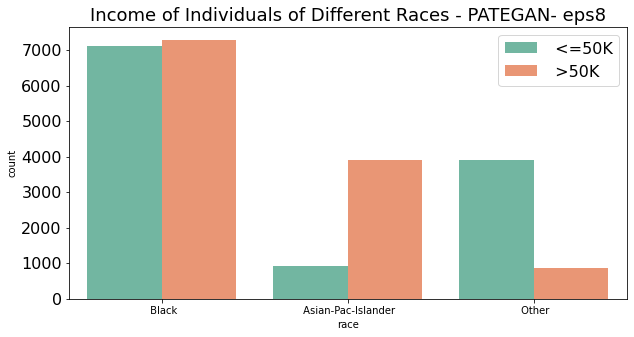

In [9]:
plt.figure(figsize=(10,5))
ax=sns.countplot(orig_df['race'], hue = orig_df['income'], palette='Set2')
plt.title('Income of Individuals of Different Races - ORIGINAL', fontsize=18)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
sns.countplot(ct_df['race'], hue = ct_df['income'], palette='Set2')
plt.title('Income of Individuals of Different Races - CTGAN', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
sns.countplot(t_df['race'], hue = t_df['income'], palette='Set2')
plt.title('Income of Individuals of Different Races - TGAN', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


plt.figure(figsize=(10,5))
sns.countplot(p2_df['race'], hue = p2_df['income'], palette='Set2')
plt.title('Income of Individuals of Different Races - PATEGAN- eps2', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


plt.figure(figsize=(10,5))
sns.countplot(p4_df['race'], hue = p4_df['income'], palette='Set2')
plt.title('Income of Individuals of Different Races - PATEGAN- eps4', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
sns.countplot(p6_df['race'], hue = p6_df['income'], palette='Set2')
plt.title('Income of Individuals of Different Races - PATEGAN- eps6', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
sns.countplot(p8_df['race'], hue = p8_df['income'], palette='Set2')
plt.title('Income of Individuals of Different Races - PATEGAN- eps8', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

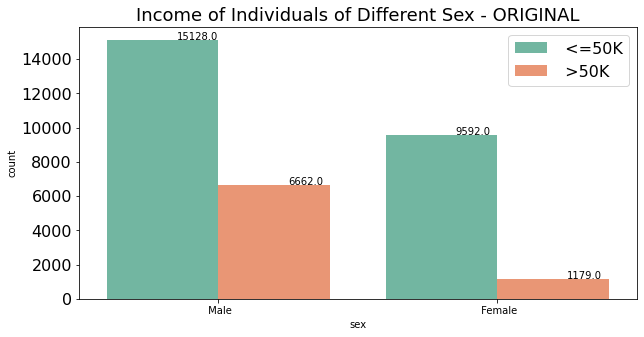

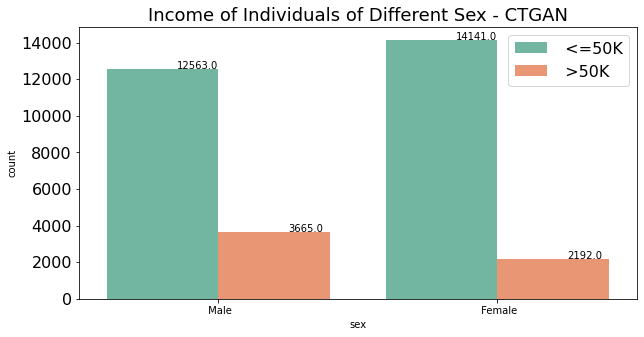

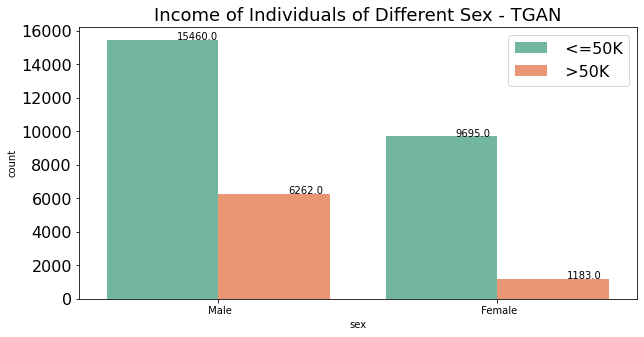

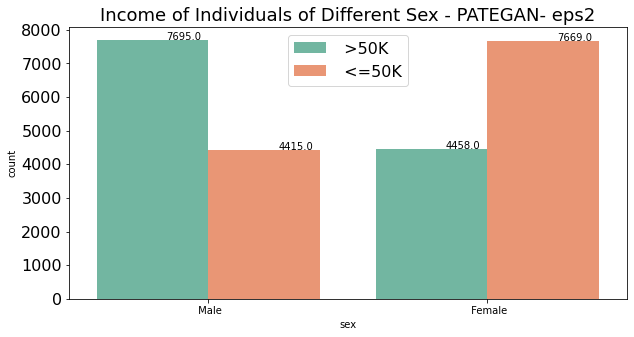

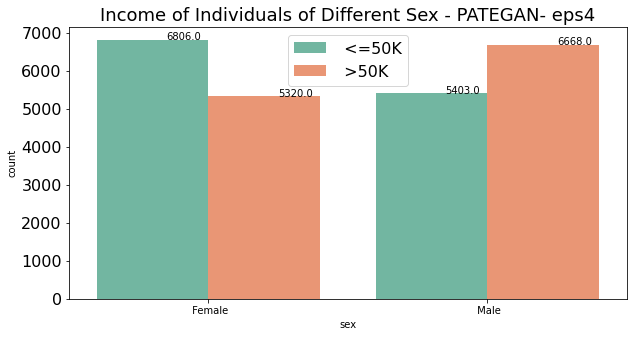

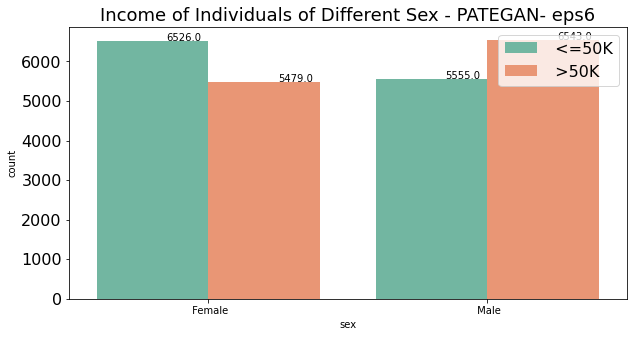

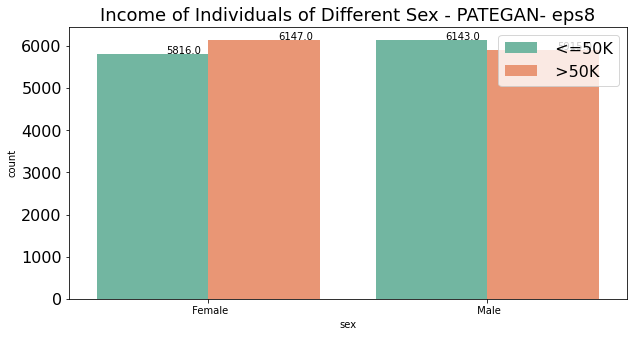

In [10]:
plt.figure(figsize=(10,5))
ax=sns.countplot(orig_df['sex'], hue = orig_df['income'], palette='Set2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Income of Individuals of Different Sex - ORIGINAL', fontsize=18)

plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
ax=sns.countplot(ct_df['sex'], hue = ct_df['income'], palette='Set2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Income of Individuals of Different Sex - CTGAN', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
ax= sns.countplot(t_df['sex'], hue = t_df['income'], palette='Set2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Income of Individuals of Different Sex - TGAN', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


plt.figure(figsize=(10,5))
ax=sns.countplot(p2_df['sex'], hue = p2_df['income'], palette='Set2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Income of Individuals of Different Sex - PATEGAN- eps2', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


plt.figure(figsize=(10,5))
ax=sns.countplot(p4_df['sex'], hue = p4_df['income'], palette='Set2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Income of Individuals of Different Sex - PATEGAN- eps4', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
ax= sns.countplot(p6_df['sex'], hue = p6_df['income'], palette='Set2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Income of Individuals of Different Sex - PATEGAN- eps6', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.figure(figsize=(10,5))
ax=sns.countplot(p8_df['sex'], hue = p8_df['income'], palette='Set2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Income of Individuals of Different Sex - PATEGAN- eps8', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

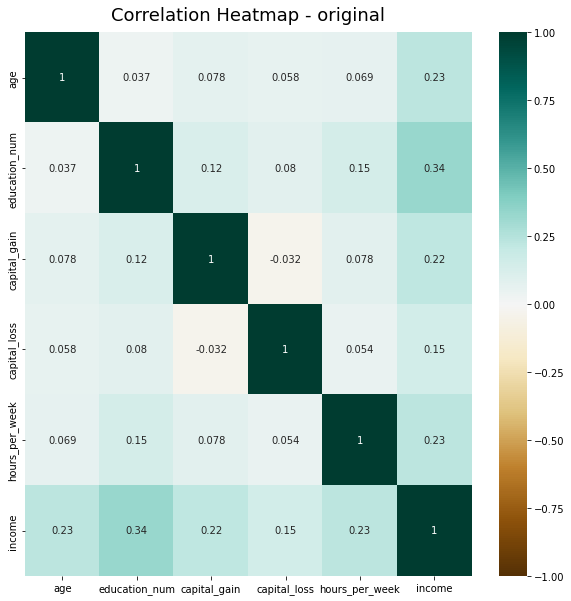

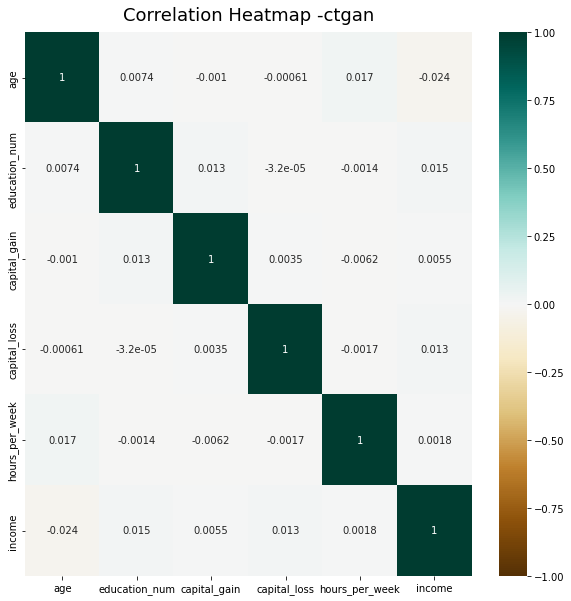

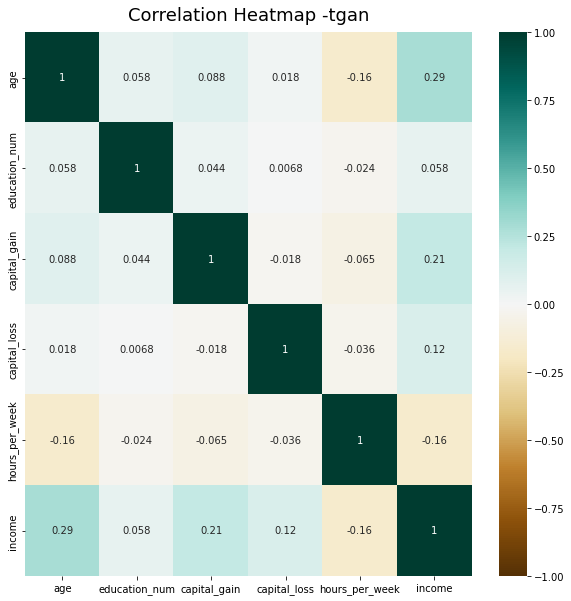

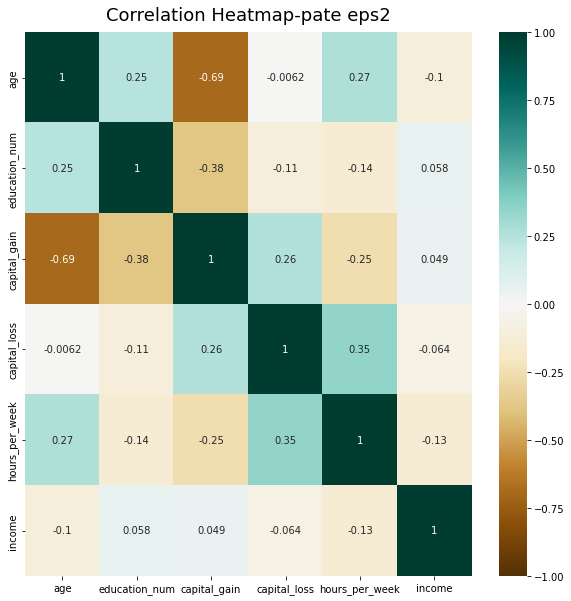

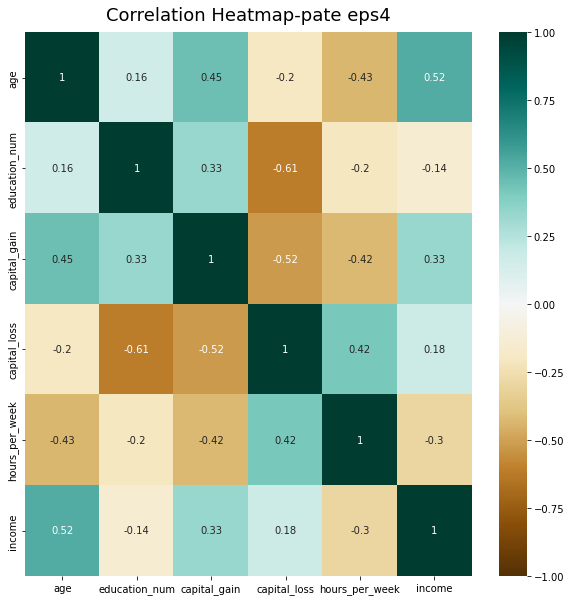

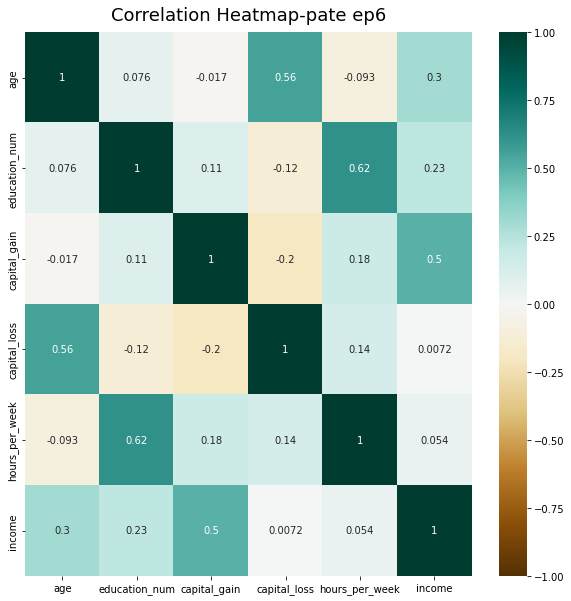

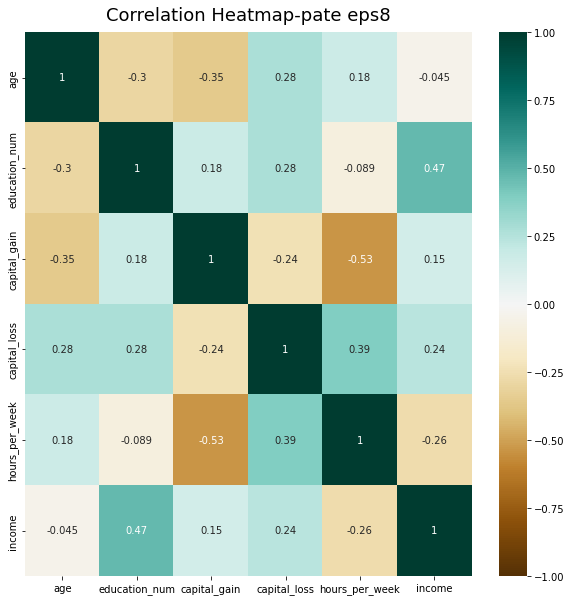

In [35]:
le = LabelEncoder()
orig_df['income'] = le.fit_transform(orig_df.income.values)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(orig_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap - original', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=0, fontsize=10)



ct_df['income'] = le.fit_transform(ct_df.income.values)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(ct_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap -ctgan', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=0, fontsize=10)



t_df['income'] = le.fit_transform(t_df.income.values)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(t_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap -tgan', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=0, fontsize=10)



p2_df['income'] = le.fit_transform(p2_df.income.values)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(p2_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap-pate eps2', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=0, fontsize=10)


p4_df['income'] = le.fit_transform(p4_df.income.values)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(p4_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap-pate eps4', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=0, fontsize=10)


p6_df['income'] = le.fit_transform(p6_df.income.values)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(p6_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap-pate ep6', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=0, fontsize=10)

p8_df['income'] = le.fit_transform(p8_df.income.values)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(p8_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap-pate eps8', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=0, fontsize=10)



In [29]:
data1 ={
        'Count':[15128, 12563, 15460, 4415, 5403,5555, 6143,9592, 14141,9695, 7669, 6806, 6526, 5816],
        'Sex':["Male","Male","Male","Male","Male","Male","Male","Female","Female","Female","Female","Female","Female","Female"],
        'GAN':['Original','CTGAN', 'TabularGAN', 'PATE-GAN E=2','PATE-GAN E=4','PATE-GAN E=6','PATE-GAN E=8' ,'Original','CTGAN', 'TabularGAN', 'PATE-GAN E=2','PATE-GAN E=4','PATE-GAN E=6','PATE-GAN E=8']
        }
df3 = pd.DataFrame(data1)

data2 ={
        'Count':[6662, 3665, 6262, 7695, 6668, 6543,5915,1179, 2192, 1183, 4458, 5320, 5479, 6147],
        'Sex':["Male","Male","Male","Male","Male","Male","Male","Female","Female","Female","Female","Female","Female","Female"],
        'GAN':['Original','CTGAN', 'TabularGAN', 'PATE-GAN E=2','PATE-GAN E=4','PATE-GAN E=6','PATE-GAN E=8' ,'Original','CTGAN', 'TabularGAN', 'PATE-GAN E=2','PATE-GAN E=4','PATE-GAN E=6','PATE-GAN E=8']
        }
df4 = pd.DataFrame(data2)

In [23]:
df3

,Count,Sex,GAN
0,15128,Male,Original
1,12563,Male,CTGAN
2,15460,Male,TabularGAN
3,4415,Male,PATE-GAN E=2
4,5403,Male,PATE-GAN E=4
5,5555,Male,PATE-GAN E=6
6,6143,Male,PATE-GAN E=8
7,9592,Female,Original
8,14141,Female,CTGAN
9,9695,Female,TabularGAN


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text major ticklabel objects>)

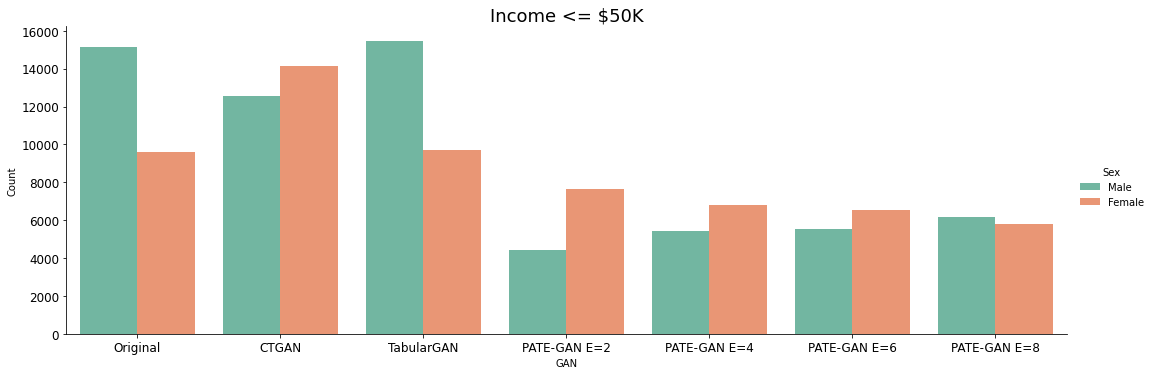

In [32]:

sns.catplot(y="Count", x="GAN",hue="Sex" ,kind="bar", data=df3, palette="Set2",height=5, aspect=3)
plt.title('Income <= $50K', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]), <a list of 10 Text major ticklabel objects>)

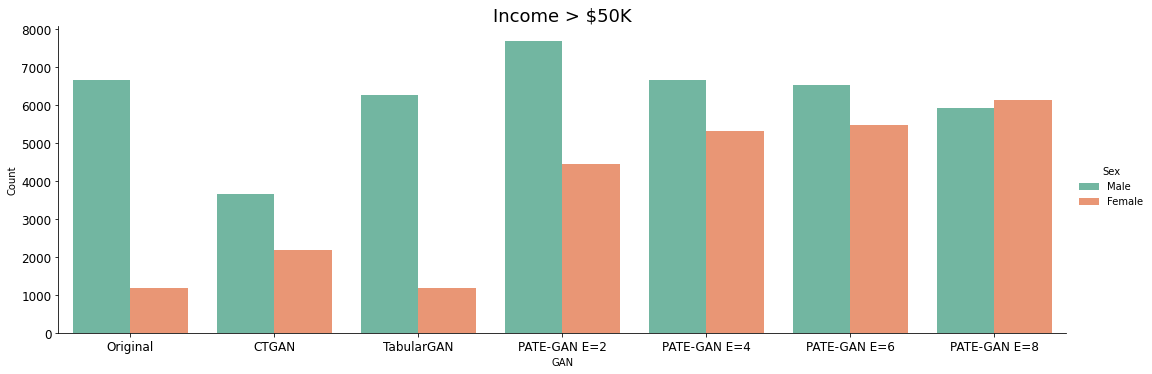

In [33]:

sns.catplot(y="Count", x="GAN",hue="Sex" ,kind="bar", data=df4, palette="Set2",height=5, aspect=3)
plt.title('Income > $50K', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

**Study on Privacy**

In [123]:
orig_df = orig_df.astype({"workclass":'category', "education":'category',"marital_status":'category',"occupation":'category',"relationship":'category',"race":'category',"sex":'category',"native_country":'category',"income":'category'})

ct_df = ct_df.astype({"workclass":'category', "education":'category',"marital_status":'category',"occupation":'category',"relationship":'category',"race":'category',"sex":'category',"native_country":'category',"income":'category'})

t_df = t_df.astype({"workclass":'category', "education":'category',"marital_status":'category',"occupation":'category',"relationship":'category',"race":'category',"sex":'category',"native_country":'category',"income":'category'})

p2_df = p2_df.astype({"workclass":'category', "education":'category',"marital_status":'category',"occupation":'category',"relationship":'category',"race":'category',"sex":'category',"native_country":'category',"income":'category'})
p4_df = p4_df.astype({"workclass":'category', "education":'category',"marital_status":'category',"occupation":'category',"relationship":'category',"race":'category',"sex":'category',"native_country":'category',"income":'category'})
p6_df = p6_df.astype({"workclass":'category', "education":'category',"marital_status":'category',"occupation":'category',"relationship":'category',"race":'category',"sex":'category',"native_country":'category',"income":'category'})
p8_df = p8_df.astype({"workclass":'category', "education":'category',"marital_status":'category',"occupation":'category',"relationship":'category',"race":'category',"sex":'category',"native_country":'category',"income":'category'})


In [124]:
%mkdir vdl
%cd vdl
! git clone https://github.com/mostly-ai/virtualdatalab.git
%cd virtualdatalab
! pip install -r requirements.txt
! pip install .

/content/vdl
Cloning into 'virtualdatalab'...
remote: Enumerating objects: 754, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (78/78), done.
^C
[Errno 2] No such file or directory: 'virtualdatalab'
/content/vdl
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [147]:
from virtualdatalab.benchmark import compare
from virtualdatalab.target_data_manipulation import prepare_common_data_format

orig_df["id"]= orig_df.index +1
ct_df["id"]= ct_df.index +1
t_df["id"]= t_df.index +1
p2_df["id"]= p2_df.index +1
p4_df["id"]= p4_df.index +1
p6_df["id"]= p6_df.index +1
p8_df["id"]= p8_df.index +1

In [148]:
orig_df= prepare_common_data_format(orig_df)
ct_df= prepare_common_data_format(ct_df)
t_df= prepare_common_data_format(t_df)
p2_df= prepare_common_data_format(p2_df)
p4_df= prepare_common_data_format(p4_df)
p6_df= prepare_common_data_format(p6_df)
p8_df= prepare_common_data_format(p8_df)

In [149]:
print("CTGAN", compare(orig_df, ct_df, metrics_to_return=['statistical-distances']))
#compare(orig_df, ct_df, metrics_to_return=['privacy-tests'])

CTGAN {'MAX univariate': 0.2157, 'L1D univariate': 0.38649, 'L1D bivariate': 0.57078, 'L1D 3-way': 0.69245, 'L1D 4-way': 0.804, 'L1D Users per Category': 0.38649, 'L1D Categories per User': 0.0}


In [150]:
print("TGAN",compare(orig_df, t_df, metrics_to_return=['statistical-distances']))
#compare(orig_df, t_df, metrics_to_return=['privacy-tests'])

TGAN {'MAX univariate': 0.19432, 'L1D univariate': 0.29904, 'L1D bivariate': 0.52942, 'L1D 3-way': 0.71631, 'L1D 4-way': 0.82546, 'L1D Users per Category': 0.29904, 'L1D Categories per User': 0.0}


In [151]:
print("PATEGAN-EP2",compare(orig_df, p2_df, metrics_to_return=['statistical-distances']))
#compare(orig_df, p2_df, metrics_to_return=['privacy-tests'])

PATEGAN-EP2 {'MAX univariate': 0.48852, 'L1D univariate': 1.16393, 'L1D bivariate': 1.46935, 'L1D 3-way': 1.53905, 'L1D 4-way': 1.38281, 'L1D Users per Category': 1.16393, 'L1D Categories per User': 0.0}


In [152]:
print("PATEGAN-EP4",compare(orig_df, p4_df, metrics_to_return=['statistical-distances']))
#compare(orig_df, p4_df, metrics_to_return=['privacy-tests'])

PATEGAN-EP4 {'MAX univariate': 0.48654, 'L1D univariate': 1.13421, 'L1D bivariate': 1.52731, 'L1D 3-way': 1.52605, 'L1D 4-way': 1.44078, 'L1D Users per Category': 1.13421, 'L1D Categories per User': 0.0}


In [153]:
print("PATEGAN-EP6",compare(orig_df, p6_df, metrics_to_return=['statistical-distances']))
#compare(orig_df, p6_df, metrics_to_return=['privacy-tests'])

PATEGAN-EP6 {'MAX univariate': 0.49426, 'L1D univariate': 1.15071, 'L1D bivariate': 1.53008, 'L1D 3-way': 1.58267, 'L1D 4-way': 1.43343, 'L1D Users per Category': 1.15071, 'L1D Categories per User': 0.0}


In [ ]:
print("PATEGAN-EP8",compare(orig_df, p8_df, metrics_to_return=['statistical-distances']))
#compare(orig_df, p8_df, metrics_to_return=['privacy-tests'])

**Study on Utility**

In [36]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [37]:
orig_df_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(orig_df)
orig_df_test_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(orig_df_test)

ct_df_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(ct_df)

t_df_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(t_df)

p2_df_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(p2_df)
p4_df_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(p4_df)
p6_df_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(p6_df)
p8_df_enc = MultiColumnLabelEncoder(columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']).fit_transform(p8_df)

In [38]:
def supervised_model_training(x_train, y_train, x_test, 
                              y_test, model_name):
  """Train supervised learning models and report the results.
  
  Args:
    - x_train, y_train: training dataset
    - x_test, y_test: testing dataset
    - model_name: supervised model name such as logisticregression
    
  Returns:
    - auc: Area Under ROC Curve
    - apr: Average Precision and Recall
  """
     
  if model_name == 'logisticregression':
    model  = LogisticRegression()
  elif model_name == 'randomforest':      
    model = RandomForestClassifier(random_state=10)
  elif model_name == 'gaussiannb':  
    model = GaussianNB()
  elif model_name == 'bernoullinb':  
    model        = BernoulliNB()
  elif model_name == 'multinb':  
    model        = MultinomialNB()
  elif model_name == 'svmlin':         
    model        = svm.LinearSVC(random_state=20) 
  elif model_name == 'gbm':         
    model         = GradientBoostingClassifier()   
  elif model_name == 'Extra Trees':
    model =  ExtraTreesClassifier(n_estimators=20)
  elif model_name == 'LDA':
    model =  LinearDiscriminantAnalysis() 
  elif model_name == 'Passive Aggressive':
    model =   PassiveAggressiveClassifier()
  elif model_name == 'AdaBoost':
    model =   AdaBoostClassifier()
  elif model_name == 'Bagging':
    model =   BaggingClassifier()
  elif model_name == 'xgb':
    model =   XGBRegressor()                                
  
  if(model_name=='svmlin' or model_name=='Passive Aggressive'): 
    model.fit(x_train, y_train)
    predict = model.decision_function(x_test)
  elif (model_name =='xgb'):
    model.fit(np.asarray(x_train), y_train)
    predict = model.predict(np.asarray(x_test))
  else:
    model.fit(x_train, y_train)
    predict = model.predict_proba(x_test)[:,1]
    
  predict2= model.predict(x_test)
  accuracy= metrics.accuracy_score(y_test, predict2)
  print("Accuracy:",accuracy)
  accuracy_list.append(accuracy)
        
  # AUC / AUPRC Computation
  auc = metrics.roc_auc_score(y_test, predict)
  print("AUC:",auc)
  apr = metrics.average_precision_score(y_test, predict)
  print("APR:",apr)
  fpr, tpr, thres = roc_curve(y_test, predict)
  
  return auc,apr,fpr,tpr, thres

In [39]:
# plotting ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [40]:
#drop education row and finalwght (only from the orig) since education num is given
orig_df_enc.drop(['education'], axis=1, inplace=True)
orig_df_test_enc.drop(['education'], axis=1, inplace=True)
ct_df_enc.drop(['education'], axis=1, inplace=True)
t_df_enc.drop(['education'], axis=1, inplace=True)
p2_df_enc.drop(['education'], axis=1, inplace=True)
p4_df_enc.drop(['education'], axis=1, inplace=True)
p6_df_enc.drop(['education'], axis=1, inplace=True)
p8_df_enc.drop(['education'], axis=1, inplace=True)


# orig_df_enc.drop(['capital_gain'], axis=1, inplace=True)
# orig_df_test_enc.drop(['capital_gain'], axis=1, inplace=True)
# ct_df_enc.drop(['capital_gain'], axis=1, inplace=True)
# t_df_enc.drop(['capital_gain'], axis=1, inplace=True)
# p2_df_enc.drop(['capital_gain'], axis=1, inplace=True)
# p4_df_enc.drop(['capital_gain'], axis=1, inplace=True)
# p6_df_enc.drop(['capital_gain'], axis=1, inplace=True)
# p8_df_enc.drop(['capital_gain'], axis=1, inplace=True)

# orig_df_enc.drop(['capital_loss'], axis=1, inplace=True)
# orig_df_test_enc.drop(['capital_loss'], axis=1, inplace=True)
# ct_df_enc.drop(['capital_loss'], axis=1, inplace=True)
# t_df_enc.drop(['capital_loss'], axis=1, inplace=True)
# p2_df_enc.drop(['capital_loss'], axis=1, inplace=True)
# p4_df_enc.drop(['capital_loss'], axis=1, inplace=True)
# p6_df_enc.drop(['capital_loss'], axis=1, inplace=True)
# p8_df_enc.drop(['capital_loss'], axis=1, inplace=True)

orig_df_enc.drop(['race'], axis=1, inplace=True)
orig_df_test_enc.drop(['race'], axis=1, inplace=True)
ct_df_enc.drop(['race'], axis=1, inplace=True)
t_df_enc.drop(['race'], axis=1, inplace=True)
p2_df_enc.drop(['race'], axis=1, inplace=True)
p4_df_enc.drop(['race'], axis=1, inplace=True)
p6_df_enc.drop(['race'], axis=1, inplace=True)
p8_df_enc.drop(['race'], axis=1, inplace=True)



## Partition into X and Y (new train, train, and then test -- same for both)
orig_df_enc_copy = orig_df_enc.copy()
orig_X_train = orig_df_enc_copy.drop('income', axis = 1)
orig_y_train = orig_df_enc_copy['income']

orig_df_test_enc_copy = orig_df_test_enc.copy()
X_test = orig_df_test_enc_copy.drop('income', axis = 1)
y_test = orig_df_test_enc_copy['income']

ct_df_enc_copy = ct_df_enc.copy()
ct_X_train = ct_df_enc_copy.drop('income', axis = 1)
ct_y_train = ct_df_enc_copy['income']

t_df_enc_copy = t_df_enc.copy()
t_X_train = t_df_enc_copy.drop('income', axis = 1)
t_y_train = t_df_enc_copy['income']

p2_df_enc_copy = p2_df_enc.copy()
p2_X_train = p2_df_enc_copy.drop('income', axis = 1)
p2_y_train = p2_df_enc_copy['income']

p4_df_enc_copy = p4_df_enc.copy()
p4_X_train = p4_df_enc_copy.drop('income', axis = 1)
p4_y_train = p4_df_enc_copy['income']

p6_df_enc_copy = p6_df_enc.copy()
p6_X_train = p6_df_enc_copy.drop('income', axis = 1)
p6_y_train = p6_df_enc_copy['income']

p8_df_enc_copy = p8_df_enc.copy()
p8_X_train = p8_df_enc_copy.drop('income', axis = 1)
p8_y_train = p8_df_enc_copy['income']


In [57]:
accuracy_list=[]
## Perform training and evaluation of specified classifier
# orig_auc, orig_apr,orig_fpr, orig_tpr, orig_thres = supervised_model_training(orig_X_train, orig_y_train, X_test, y_test, 'logisticregression')
# ct_auc, ct_apr, ct_fpr, ct_tpr, ct_thres = supervised_model_training(ct_X_train, ct_y_train, X_test, y_test, 'logisticregression')
# t_auc, t_apr, t_fpr, t_tpr, t_thres = supervised_model_training(t_X_train, t_y_train, X_test, y_test, 'logisticregression')
# p2_auc, p2_apr, p2_fpr, p2_tpr, p2_thres = supervised_model_training(p2_X_train, p2_y_train, X_test, y_test, 'logisticregression')
# p4_auc, p4_apr, p4_fpr, p4_tpr, p4_thres = supervised_model_training(p4_X_train, p4_y_train, X_test, y_test, 'logisticregression')
# p6_auc, p6_apr, p6_fpr, p6_tpr, p6_thres = supervised_model_training(p6_X_train, p6_y_train, X_test, y_test, 'logisticregression')
# p8_auc, p8_apr, p8_fpr, p8_tpr, p8_thres = supervised_model_training(p8_X_train, p8_y_train, X_test, y_test, 'logisticregression')

# orig_auc, orig_apr,orig_fpr, orig_tpr, orig_thres = supervised_model_training(orig_X_train, orig_y_train, X_test, y_test, 'svmlin')
# ct_auc, ct_apr, ct_fpr, ct_tpr, ct_thres = supervised_model_training(ct_X_train, ct_y_train, X_test, y_test, 'svmlin')
# t_auc, t_apr, t_fpr, t_tpr, t_thres = supervised_model_training(t_X_train, t_y_train, X_test, y_test, 'svmlin')
# p2_auc, p2_apr, p2_fpr, p2_tpr, p2_thres = supervised_model_training(p2_X_train, p2_y_train, X_test, y_test, 'svmlin')
# p4_auc, p4_apr, p4_fpr, p4_tpr, p4_thres = supervised_model_training(p4_X_train, p4_y_train, X_test, y_test, 'svmlin')
# p6_auc, p6_apr, p6_fpr, p6_tpr, p6_thres = supervised_model_training(p6_X_train, p6_y_train, X_test, y_test, 'svmlin')
# p8_auc, p8_apr, p8_fpr, p8_tpr, p8_thres = supervised_model_training(p8_X_train, p8_y_train, X_test, y_test, 'svmlin')

# orig_auc, orig_apr,orig_fpr, orig_tpr, orig_thres = supervised_model_training(orig_X_train, orig_y_train, X_test, y_test, 'randomforest')
# ct_auc, ct_apr, ct_fpr, ct_tpr, ct_thres = supervised_model_training(ct_X_train, ct_y_train, X_test, y_test, 'randomforest')
# t_auc, t_apr, t_fpr, t_tpr, t_thres = supervised_model_training(t_X_train, t_y_train, X_test, y_test, 'randomforest')
p2_auc, p2_apr, p2_fpr, p2_tpr, p2_thres = supervised_model_training(p2_X_train, p2_y_train, X_test, y_test, 'randomforest')
p4_auc, p4_apr, p4_fpr, p4_tpr, p4_thres = supervised_model_training(p4_X_train, p4_y_train, X_test, y_test, 'randomforest')
p6_auc, p6_apr, p6_fpr, p6_tpr, p6_thres = supervised_model_training(p6_X_train, p6_y_train, X_test, y_test, 'randomforest')
p8_auc, p8_apr, p8_fpr, p8_tpr, p8_thres = supervised_model_training(p8_X_train, p8_y_train, X_test, y_test, 'randomforest')

## Print results
print(f"Original dataset            => {orig_auc}, {orig_apr}")
print(f"Synthetic CT-GAN dataset => {ct_auc}, {ct_apr}")
print(f"Synthetic T-GAN dataset => {t_auc}, {t_apr}")
print(f"Synthetic PATE-GAN2 dataset => {p2_auc}, {p2_apr}")
print(f"Synthetic PATE-GAN4 dataset => {p4_auc}, {p4_apr}")
print(f"Synthetic PATE-GAN6 dataset => {p6_auc}, {p6_apr}")
print(f"Synthetic PATE-GAN8 dataset => {p8_auc}, {p8_apr}")

# plot_roc_curve(orig_fpr, orig_tpr)
# plot_roc_curve(ct_fpr, ct_tpr)
# plot_roc_curve(t_fpr, t_tpr)
# plot_roc_curve(p2_fpr, p2_tpr)
# plot_roc_curve(p4_fpr, p4_tpr)
# plot_roc_curve(p6_fpr, p6_tpr)
# plot_roc_curve(p8_fpr, p8_tpr)

Accuracy: 0.42786069651741293
AUC: 0.5613628622346342
APR: 0.2844354706969989
Accuracy: 0.7537620539278914
AUC: 0.5223342033801979
APR: 0.24254612734636072
Accuracy: 0.7667219458264234
AUC: 0.674733136490719
APR: 0.39932486167549497
Accuracy: 0.749953934033536
AUC: 0.6611673473774496
APR: 0.3929636157794429
Original dataset            => 0.8961364461816108, 0.763252023128748
Synthetic CT-GAN dataset => 0.6667638124905776, 0.372388941726449
Synthetic T-GAN dataset => 0.8303422623434892, 0.6098598087215737
Synthetic PATE-GAN2 dataset => 0.5613628622346342, 0.2844354706969989
Synthetic PATE-GAN4 dataset => 0.5223342033801979, 0.24254612734636072
Synthetic PATE-GAN6 dataset => 0.674733136490719, 0.39932486167549497
Synthetic PATE-GAN8 dataset => 0.6611673473774496, 0.3929636157794429


In [33]:
data ={'Accuracy':[i for i in accuracy_list],
        'AUC':[orig_auc, p2_auc,p4_auc,p6_auc,p8_auc],
        'APR':[orig_apr, p2_apr,p4_apr,p6_apr,p8_apr],
        'GAN':['Original','E=2','E=4','E=6','E=8']}
df = pd.DataFrame(data)

In [76]:
l1= [i for i in accuracy_list]
l2= [p2_auc,p4_auc,p6_auc,p8_auc]
print(l2)
l3= [p2_apr,p4_apr,p6_apr,p8_apr]
for i in l2:
  l1.append(i)
for i in l3:
  l1.append(i)
print(l1)

d1 ={
        'Value':[i for i in l1],
        'Metric':["Accuracy","Accuracy","Accuracy","Accuracy","AUC","AUC","AUC","AUC","AUPRC","AUPRC","AUPRC","AUPRC"],
        'PATE-GAN epsilon':['2','4','6','8' , '2','4','6','8','2','4','6','8']
}
df3 = pd.DataFrame(d1)

[0.5613628622346342, 0.5223342033801979, 0.674733136490719, 0.6611673473774496]
[0.42786069651741293, 0.7537620539278914, 0.7667219458264234, 0.749953934033536, 0.5613628622346342, 0.5223342033801979, 0.674733136490719, 0.6611673473774496, 0.2844354706969989, 0.24254612734636072, 0.39932486167549497, 0.3929636157794429]


In [77]:
df3

,Value,Metric,PATE-GAN epsilon
0,0.427861,Accuracy,2
1,0.753762,Accuracy,4
2,0.766722,Accuracy,6
3,0.749954,Accuracy,8
4,0.561363,AUC,2
5,0.522334,AUC,4
6,0.674733,AUC,6
7,0.661167,AUC,8
8,0.284435,AUPRC,2
9,0.242546,AUPRC,4


In [35]:
df2= df[1:]

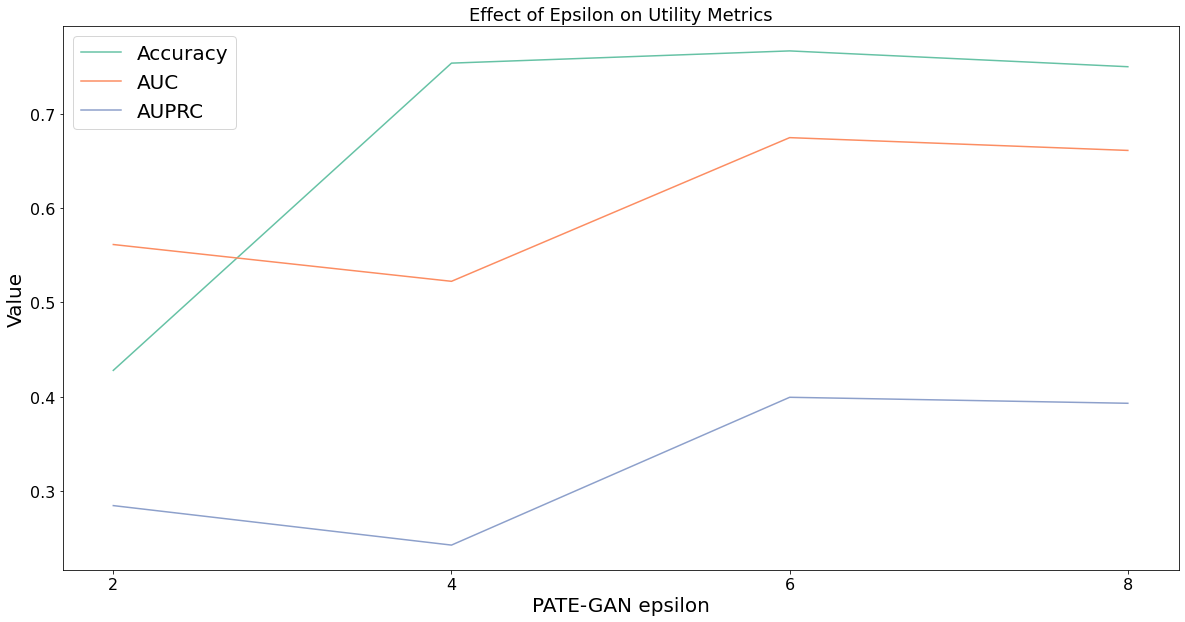

In [95]:
plt.figure(figsize=(20, 10))
sns.lineplot(y="Value", x="PATE-GAN epsilon", hue= "Metric",  data=df3,palette="Set2")
plt.title('Effect of Epsilon on Utility Metrics', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("PATE-GAN epsilon",fontsize=20)
plt.ylabel("Value",fontsize=20)
plt.legend(loc="upper left", frameon=True, fontsize= 20)
plt.savefig("a1.pdf")


No handles with labels found to put in legend.


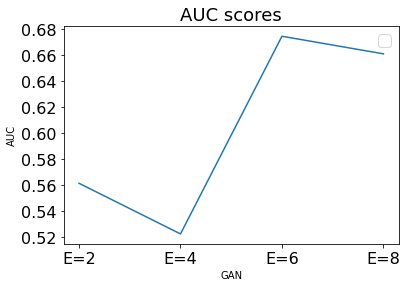

In [37]:
#sns.catplot(y="AUC", x="GAN", kind="bar", data=df,palette="Set2",height=5, aspect=2)
sns.lineplot(y="AUC", x="GAN", hue= "Metric"data=df2,palette="Set2")
plt.title('AUC scores', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


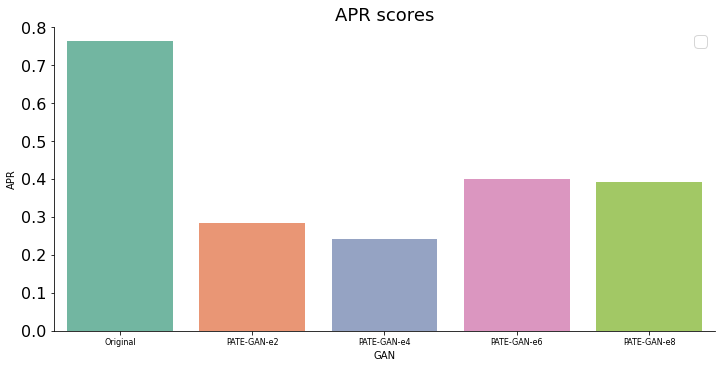

In [26]:
sns.catplot(y="APR", x="GAN", kind="bar", data=df,palette="Set2",height=5, aspect=2)
plt.title('APR scores', fontsize=18)
plt.xticks(fontsize=8)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Study on Fairness**

In [140]:
!pip install fairlearn
from sklearn.pipeline import Pipeline
from fairlearn.metrics import selection_rate, equalized_odds_difference, equalized_odds_ratio, demographic_parity_ratio, demographic_parity_difference,true_negative_rate, true_positive_rate, false_positive_rate

In [101]:
sex_df =X_test["sex"]
sex_df

0        1
1        1
2        1
3        1
4        0
        ..
16276    0
16277    1
16278    1
16279    1
16280    1
Name: sex, Length: 16281, dtype: int64

In [59]:
X_test

,age,workclass,education_num,marital_status,occupation,relationship,sex,hours_per_week,native_country
0,25,4,7,4,7,3,1,40,38
1,38,4,9,2,5,0,1,50,38
2,28,2,12,2,11,0,1,40,38
3,44,4,10,2,7,0,1,40,38
4,18,0,10,4,0,3,0,30,38
...,...,...,...,...,...,...,...,...,...
16276,39,4,13,0,10,1,0,36,38
16277,64,0,9,6,0,2,1,40,38
16278,38,4,13,2,10,0,1,50,38
16279,44,4,13,0,1,3,1,40,38


In [142]:
clf = RandomForestClassifier(random_state=10)
clf.fit(orig_X_train, orig_y_train)
y_pred = clf.predict(X_test)
print("Original EOD:",equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
#print("Original EOR:",equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
#print("Original DPR:",demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("Original DPD:",demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("Original SR", selection_rate(y_true=y_test, y_pred=y_pred, pos_label=1, sample_weight=None))
print("Original TPR", true_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))
print("Original FPR", false_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))

t=clf.fit(t_X_train, t_y_train)
y_pred = clf.predict(X_test)
print("T EOD:",equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
#print("T EOR:",equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
#print("T DPR:",demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("T DPD:",demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("T SR", selection_rate(y_true=y_test, y_pred=y_pred, pos_label=1, sample_weight=None))
print("T TPR", true_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))
print("T FPR", false_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))

p2=clf.fit(p2_X_train, p2_y_train)
y_pred = clf.predict(X_test)
print("PATE EP2 EOD:",equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP2 EOR:",equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP2 DPR:",demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP2 DPD:",demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP2 SR", selection_rate(y_true=y_test, y_pred=y_pred, pos_label=1, sample_weight=None))
print("PATE EP2 TPR", true_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))
print("PATE EP2 FPR", false_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))

p4=clf.fit(p4_X_train, p4_y_train)
y_pred = clf.predict(X_test)
print("PATE EP4 EOD:",equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP4 EOR:",equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP4 DPR:",demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP4 DPD:",demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP4 SR", selection_rate(y_true=y_test, y_pred=y_pred, pos_label=1, sample_weight=None))
print("PATE EP4 TPR", true_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))
print("PATE EP4 FPR", false_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))


p6=clf.fit(p6_X_train, p6_y_train)
y_pred = clf.predict(X_test)
print("PATE EP6 EOD:",equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP6 EOR:",equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP6 DPR:",demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP6 DPD:",demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP6 SR", selection_rate(y_true=y_test, y_pred=y_pred, pos_label=1, sample_weight=None))
print("PATE EP6 TPR", true_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))
print("PATE EP6 FPR", false_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))


p8=clf.fit(p8_X_train, p8_y_train)
y_pred = clf.predict(X_test)
print("PATE EP8 EOD:",equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP8 EOR:",equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
# print("PATE EP8 DPR:",demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP8 DPD:",demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features= sex_df))
print("PATE EP8 SR", selection_rate(y_true=y_test, y_pred=y_pred, pos_label=1, sample_weight=None))
print("PATE EP8 TPR", true_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))
print("PATE EP8 FPR", false_positive_rate(y_true=y_test,  y_pred=y_pred,pos_label=1, sample_weight=None))



Original EOD: 0.07544395627441614
Original DPD: 0.1718706972373652
Original SR 0.1971009151772004
Original TPR 0.6008840353614144
Original FPR 0.07221552070767993
T EOD: 0.1652490317744555
T DPD: 0.19889110386149222
T SR 0.19059025858362508
T TPR 0.453458138325533
T FPR 0.10928829915560917
PATE EP2 EOD: 0.2743305709407404
PATE EP2 DPD: 0.04770561791111105
PATE EP2 SR 0.693876297524722
PATE EP2 TPR 0.7576703068122725
PATE EP2 FPR 0.6741455568958584
PATE EP4 EOD: 0.00957814517136551
PATE EP4 DPD: 0.0002530062647714375
PATE EP4 SR 0.014188317670904735
PATE EP4 TPR 0.008840353614144566
PATE EP4 FPR 0.01584238037796542
PATE EP6 EOD: 0.021622662724357637
PATE EP6 DPD: 0.020689186007759878
PATE EP6 SR 0.031324857195503965
PATE EP6 TPR 0.07254290171606864
PATE EP6 FPR 0.018576598311218336
PATE EP8 EOD: 0.005159705159705152
PATE EP8 DPD: 0.03624975922364532
PATE EP8 SR 0.1534918002579694
PATE EP8 TPR 0.2956318252730109
PATE EP8 FPR 0.10952955367913149


In [186]:
clf2 = RandomForestClassifier(random_state=10)
clf2.fit(ct_X_train, ct_y_train)
y_pred_ct = clf2.predict(X_test)
print("CT EOD:",equalized_odds_difference(y_true=y_test, y_pred=y_pred_ct, sensitive_features= sex_df))
#print("CT EOR:",equalized_odds_ratio(y_true=y_test, y_pred=y_pred_ct, sensitive_features= sex_df))
#print("CT DPR:",demographic_parity_ratio(y_true=y_test, y_pred=y_pred_ct, sensitive_features= sex_df))
print("CT DPD:",demographic_parity_difference(y_true=y_test, y_pred=y_pred_ct, sensitive_features= sex_df))

CT EOD: 0.008616514355657849
CT DPD: 0.006162702647062122


In [72]:
d2 ={
        'Value':[0.274,0.009,0.021,0.005,0.047,0.0002,0.020,0.036],
        'Metric':["EoD","EoD","EoD","EoD","DPD","DPD","DPD","DPD"],
        'PATE-GAN epsilon':['2','4','6','8' , '2','4','6','8']
        }
df5= pd.DataFrame(d2)

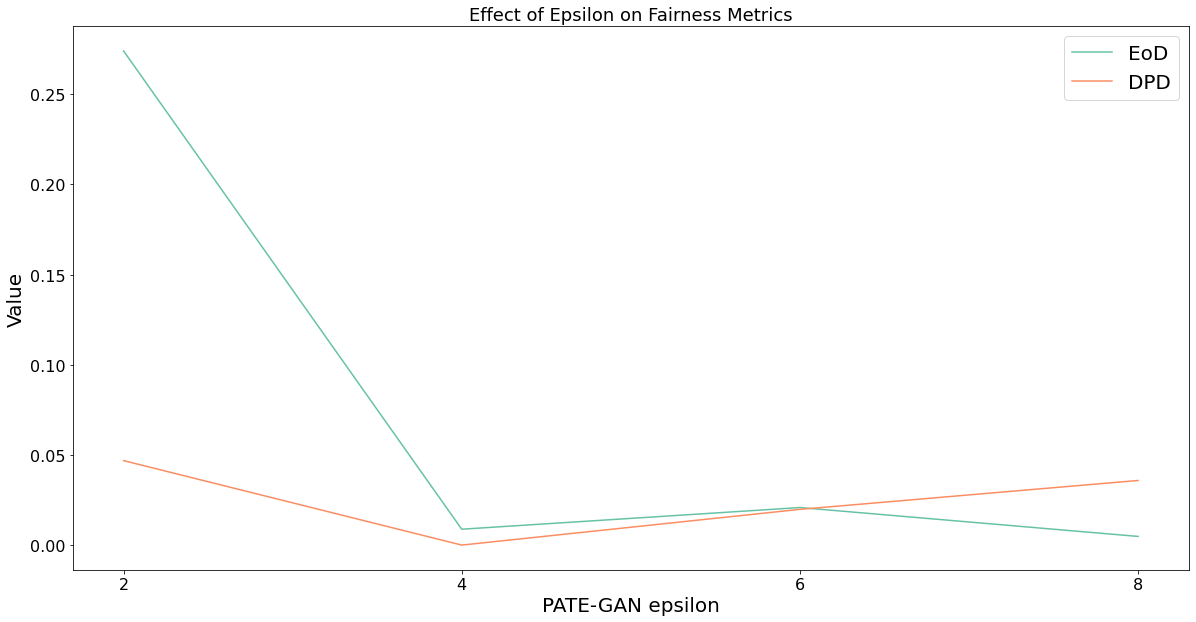

In [96]:
plt.figure(figsize=(20, 10))
sns.lineplot(y="Value", x="PATE-GAN epsilon", hue= "Metric",  data=df5, palette="Set2")
plt.title('Effect of Epsilon on Fairness Metrics', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("PATE-GAN epsilon",fontsize=20)
plt.ylabel("Value",fontsize=20)
plt.legend(loc="upper right", frameon=True, fontsize= 20)
plt.savefig("a2.pdf")